## **BlackFriday Dataset EDA and Feature Engineering**
#### **Cleaning and preparing the data for Model Training**

#### **Importing Libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## **Problem Statement**

A retail company 'ABC Private Limited' wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The dataset also contains customer demographics (age, gender, marital status, city, stay in current city), product details (product_id and product_category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

#### **Importing Dataset**


In [2]:
df_train = pd.read_csv('blackfriday_train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_test = pd.read_csv('blackfriday_test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


#### **Merge both test and train data**


In [4]:
df = pd.concat([df_train, df_test])

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.drop('User_ID', inplace=True, axis=1)

In [9]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


#### **Handling categorical feature Gender**


In [10]:
df['Gender'] = df['Gender'].map({'F':0, 'M':1})

In [11]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

#### **Handling categorical feature Age**


In [13]:
df['Age'] = df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})

#### **Handling categorical feature City_Category**


In [14]:
df_city = pd.get_dummies(df['City_Category'], drop_first=True)

df_city['B'] = df_city['B'].astype(int)
df_city['C'] = df_city['C'].astype(int)

df = pd.concat([df, df_city], axis=1)
df.drop('City_Category', axis=1, inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(2)
memory usage: 71.7+ MB


In [16]:
# Handling Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


In [18]:
int_columns = df.select_dtypes(include=['int64','int32']).columns.tolist()
int_columns

['Gender',
 'Age',
 'Occupation',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'B',
 'C']

In [19]:
df.isnull().sum().sort_values(ascending=False)

Product_Category_3            545809
Product_Category_2            245982
Purchase                      233599
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
B                                  0
C                                  0
dtype: int64

#### **Handling Missing Values**

In [20]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df.drop(columns=['Product_ID','Purchase'])
y = df['Purchase']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (626933, 10)
X_test shape: (156734, 10)
y_train shape: (626933,)
y_test shape: (156734,)


In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create an instance of IterativeImputer
imputer = IterativeImputer(random_state=42)

# Impute missing values in the dataset
X_imputed = imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame
df_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Display the first few rows of the imputed DataFrame
df_imputed.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0.0,1.0,10.0,2.0,0.0,3.0,8.436032,12.965109,0.0,0.0
1,0.0,1.0,10.0,2.0,0.0,1.0,6.000000,14.000000,0.0,0.0
2,0.0,1.0,10.0,2.0,0.0,12.0,15.955314,16.101169,0.0,0.0
3,0.0,1.0,10.0,2.0,0.0,12.0,14.000000,15.080716,0.0,0.0
4,1.0,7.0,16.0,4.0,0.0,8.0,13.364230,16.027111,0.0,1.0


In [22]:
df_imputed.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
B                             0
C                             0
dtype: int64

In [23]:
df_product_purchase = df[['Product_ID', 'Purchase']]
df_product_purchase.head()

,Product_ID,Purchase
0,P00069042,8370.0
1,P00248942,15200.0
2,P00087842,1422.0
3,P00085442,1057.0
4,P00285442,7969.0


In [24]:
df_pro_reset = df_product_purchase.reset_index(drop=True)
df_imputed_reset = df_imputed.reset_index(drop=True)

df_combined = pd.concat([df_pro_reset, df_imputed_reset], axis=1)
df_combined.head()

,Product_ID,Purchase,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,8370.0,0.0,1.0,10.0,2.0,0.0,3.0,8.436032,12.965109,0.0,0.0
1,P00248942,15200.0,0.0,1.0,10.0,2.0,0.0,1.0,6.000000,14.000000,0.0,0.0
2,P00087842,1422.0,0.0,1.0,10.0,2.0,0.0,12.0,15.955314,16.101169,0.0,0.0
3,P00085442,1057.0,0.0,1.0,10.0,2.0,0.0,12.0,14.000000,15.080716,0.0,0.0
4,P00285442,7969.0,1.0,7.0,16.0,4.0,0.0,8.0,13.364230,16.027111,0.0,1.0


In [25]:
df_combined.isnull().sum()

Product_ID                         0
Purchase                      233599
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
B                                  0
C                                  0
dtype: int64

In [26]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Purchase                    550068 non-null  float64
 2   Gender                      783667 non-null  float64
 3   Age                         783667 non-null  float64
 4   Occupation                  783667 non-null  float64
 5   Stay_In_Current_City_Years  783667 non-null  float64
 6   Marital_Status              783667 non-null  float64
 7   Product_Category_1          783667 non-null  float64
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  B                           783667 non-null  float64
 11  C                           783667 non-null  float64
dtypes: float64(11), object(1)
memory usage: 71.7+ MB


In [27]:
for col in int_columns:
    df_combined[col] = df_combined[col].astype('int64')

In [28]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Purchase                    550068 non-null  float64
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


#### **Visualisation of Data**

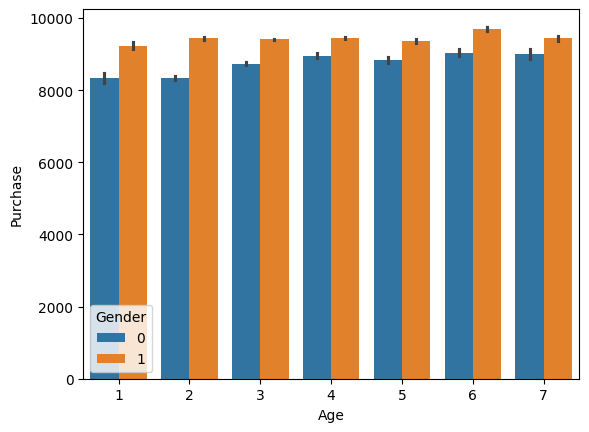

In [29]:
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df_combined)
plt.show()

#### `Observations`: Purchasing of men is more than women

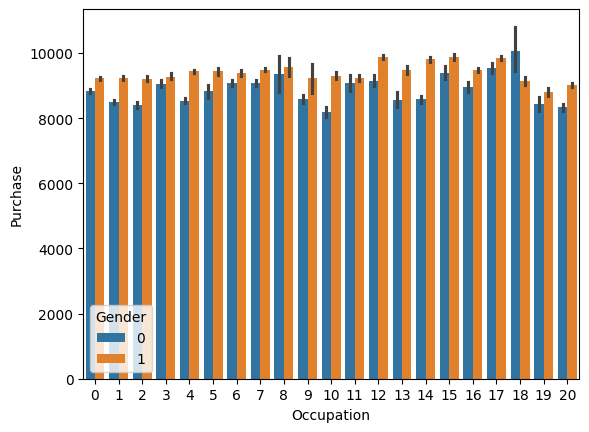

In [30]:
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df_combined)
plt.show()

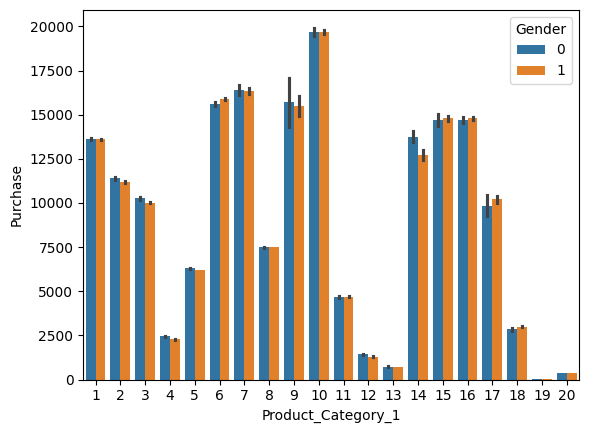

In [31]:
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df_combined)
plt.show()

#### **Feature Scaling**

In [65]:
gg = df_combined.drop('Product_ID', axis=1)
gg_test = gg[gg['Purchase'].isnull()]
gg_train = gg[~gg['Purchase'].isnull()]

In [69]:
gg_train.head()

,Purchase,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,8370.0,0,1,10,2,0,3,8.436032,12.965109,0,0
1,15200.0,0,1,10,2,0,1,6.000000,14.000000,0,0
2,1422.0,0,1,10,2,0,12,15.955314,16.101169,0,0
3,1057.0,0,1,10,2,0,12,14.000000,15.080716,0,0
4,7969.0,1,7,16,4,0,8,13.364230,16.027111,0,1


In [71]:
X = gg_train.drop(columns=['Purchase'])
y = gg_train['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = RandomForestRegressor()

# Train the model
model.fit(scaled_train, y_train)

# Make predictions
y_pred = model.predict(scaled_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 9401441.707913684
R^2 Score: 0.6258308374563049
